# Master Thesis - Feeder Distribution Test

In [2]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import pandas as pd
import numpy as np
import os
import time
import datetime

import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph

pd.set_option('future.no_silent_downcasting', True)

## Connection to Simulation

We connect to the simulation and assess the part feeder data. Consider this was performed on a different model (only feeders), due to the computational load of multiple models.The purpose of this code is to assess the size distribution simulated by the feeders - note that the Box-Müller algorithm has been used, becaus in Lua no module with normal distribution is available.

In [3]:
# Simulation file name: parts_dist_test.ttt
client = RemoteAPIClient()

sim = client.require('sim')
simBWF = client.require('simBWF')


feeder_1 = sim.getObject('/genericFeeder[0]')
feeder_2 = sim.getObject('/genericFeeder[1]')
feeder_3 = sim.getObject('/genericFeeder[2]')



In [4]:
feeder_1_df = pd.DataFrame()
feeder_2_df = pd.DataFrame()
feeder_3_df = pd.DataFrame()

sim.setStepping(True)
sim.startSimulation()
sim.setBoolParam(sim.boolparam_display_enabled, False)

while (t := sim.getSimulationTime()) < 200  : 
    feeder_1_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(feeder_1,'customData'))])
    feeder_2_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(feeder_2,'customData'))])
    feeder_3_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(feeder_3,'customData'))])
    
    feeder_1_df= pd.concat([feeder_1_df,feeder_1_data], ignore_index=True)
    feeder_2_df= pd.concat([feeder_2_df,feeder_2_data], ignore_index=True)
    feeder_3_df= pd.concat([feeder_3_df,feeder_3_data], ignore_index=True)
    sim.step()

sim.stopSimulation()

feeder_1_df = pd.DataFrame(feeder_1_df['size'].tolist(), columns=['sizeX', 'sizeY', 'sizeZ', 'insideScaling'])
feeder_2_df = pd.DataFrame(feeder_2_df['size'].tolist(), columns=['sizeX', 'sizeY', 'sizeZ', 'insideScaling'])
feeder_3_df = pd.DataFrame(feeder_3_df['size'].tolist(), columns=['sizeX', 'sizeY', 'sizeZ', 'insideScaling'])


## Plots of Camera

Here we plot the data captured by the camera.

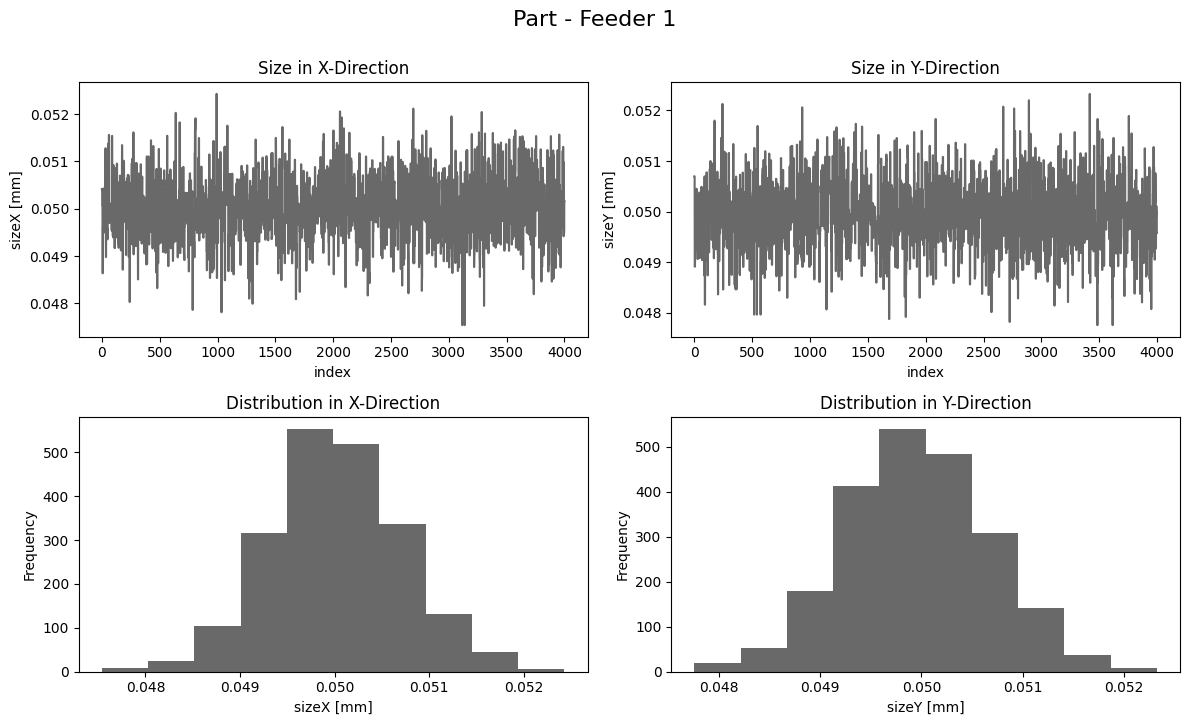

In [32]:
fig,axs = plt.subplots(2,2,figsize = (12,8))
fig.suptitle('Part - Feeder 1',fontsize=16, y = 0.9)

axs[0,0].plot(feeder_1_df['sizeX'],color= 'dimgray')
axs[0,1].plot(feeder_1_df['sizeY'],color= 'dimgray')
axs[1,0].hist(feeder_1_df['sizeX'], density = True,color= 'dimgray')
axs[1,1].hist(feeder_1_df['sizeY'], density = True,color= 'dimgray')

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX [mm]')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY [mm]')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX [mm]')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY [mm]')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.9])


Text(0, 0.5, 'Frequency')

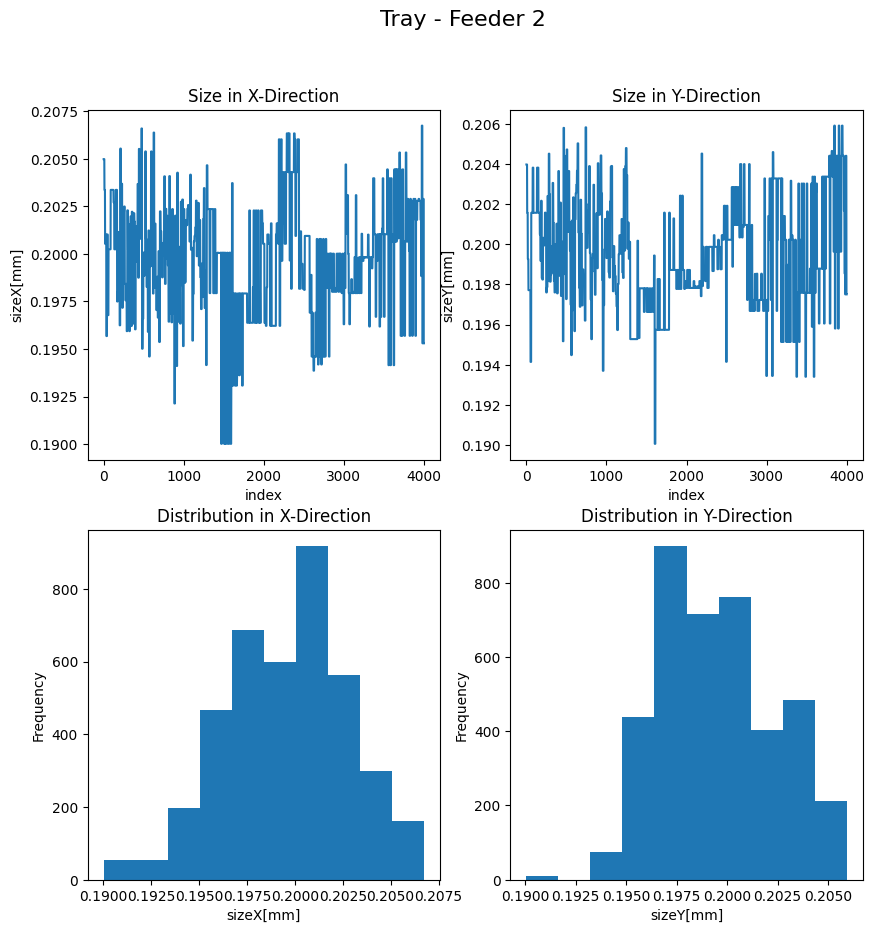

In [8]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('Tray - Feeder 2',fontsize=16)

axs[0,0].plot(feeder_2_df['sizeX'])
axs[0,1].plot(feeder_2_df['sizeY'])
axs[1,0].hist(feeder_2_df['sizeX'])
axs[1,1].hist(feeder_2_df['sizeY'])

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX[mm]')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY[mm]')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX[mm]')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY[mm]')
axs[1, 1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

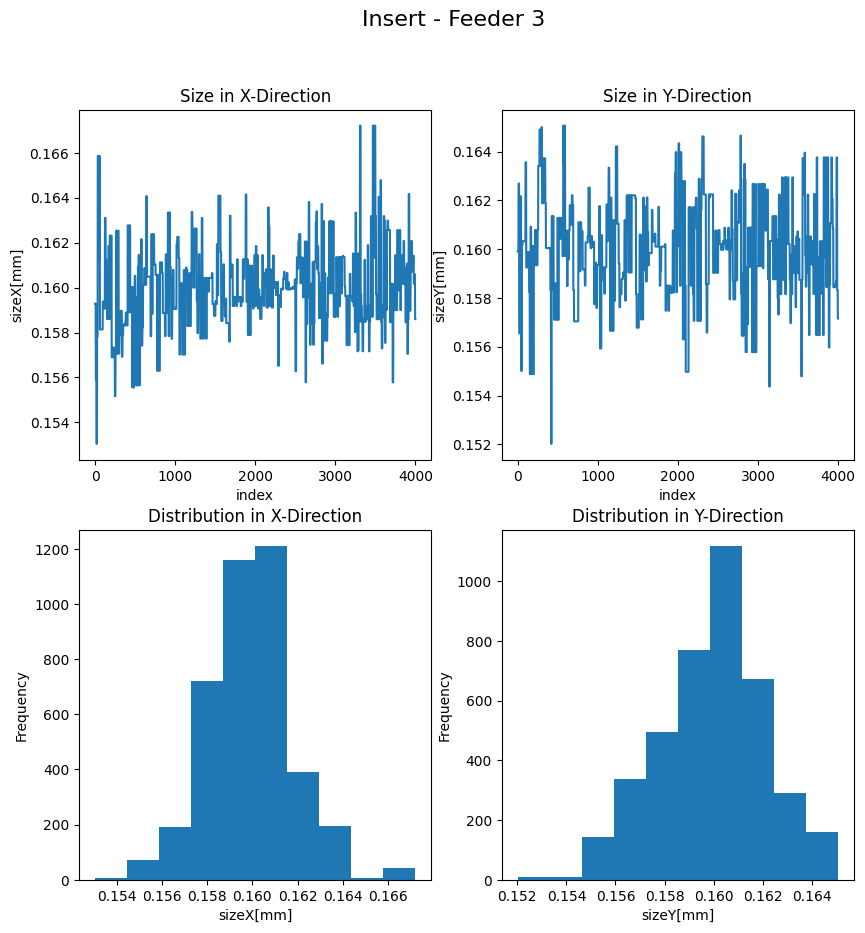

In [10]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('Insert - Feeder 3',fontsize=16)

axs[0,0].plot(feeder_3_df['sizeX'])
axs[0,1].plot(feeder_3_df['sizeY'])
axs[1,0].hist(feeder_3_df['sizeX'])
axs[1,1].hist(feeder_3_df['sizeY'])

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX[mm]')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY[mm]')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX[mm]')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY[mm]')
axs[1, 1].set_ylabel('Frequency')